In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from utils import *
%load_ext autoreload
%autoreload 2
import random
with open('TSPD.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile, delimiter=';'))
    for item in range(len(data)):
        i = data[item]
        data[item] = [int(i[0]),int(i[1]),int(i[2])]


data = np.array([(0, 0), (1, 2), (2, 4), (3, 1), (7, 3), (2,5), (4,4)]) * 10
NR_NODES = len(data)
HALF_NODES = int(len(data)/2)
print(data)
print(NR_NODES)

if len(data[0])==2:
    is_cost = False
print("is_cost",is_cost)
matrix, cost_list =  get_dist_matrix_and_cost(data, cost=is_cost)
matrix



[[ 0  0]
 [10 20]
 [20 40]
 [30 10]
 [70 30]
 [20 50]
 [40 40]]
7
is_cost False


array([[        inf, 22.36067977, 44.72135955, 31.6227766 , 76.15773106,
        53.85164807, 56.56854249],
       [22.36067977,         inf, 22.36067977, 22.36067977, 60.8276253 ,
        31.6227766 , 36.05551275],
       [44.72135955, 22.36067977,         inf, 31.6227766 , 50.99019514,
        10.        , 20.        ],
       [31.6227766 , 22.36067977, 31.6227766 ,         inf, 44.72135955,
        41.23105626, 31.6227766 ],
       [76.15773106, 60.8276253 , 50.99019514, 44.72135955,         inf,
        53.85164807, 31.6227766 ],
       [53.85164807, 31.6227766 , 10.        , 41.23105626, 53.85164807,
                inf, 22.36067977],
       [56.56854249, 36.05551275, 20.        , 31.6227766 , 31.6227766 ,
        22.36067977,         inf]])

In [2]:
def count_cost_diff_cycle(edge, new_n, dist_m):
    start_n = edge[0]
    end_n = edge[1]
    # cost(start-end) + cost(start, new) + cost(end,new) + cost(new)print(distance_matrix[:10][:10])
    cost_diff = - dist_m[start_n][ end_n] + dist_m[start_n][ new_n] + dist_m[new_n][end_n]
    # assert cost_diff>0, f'{cost_diff, - dist_m[start_n][ end_n], dist_m[start_n][ new_n], dist_m[new_n][end_n]}' #
    return cost_diff

def create_regret_matrix(non_visited, cur_tour, dist_m): #cur_tour = edges
    reg_matrix = np.zeros((len(dist_m),len(cur_tour)))
    for new_node in non_visited:
        for i,edge in enumerate(cur_tour):
            reg_matrix[new_node][i]=count_cost_diff_cycle(edge, new_node, dist_m)
    # print("reg_matrix",reg_matrix)
    return reg_matrix


def return_biggest_regret(matrix):
    min_values_for_rows = np.min(matrix, axis=1)
    print("min_values_for_rows",min_values_for_rows)
    rescue_node = np.argmax(min_values_for_rows, axis=0) #najlepiej ratować 4 index
    print("City with bigest regret",rescue_node)
    rescueing_node = np.argmin(matrix[rescue_node])# def return_max_from_min_rows_regret(matrix):
    print("Rescueing edge index to modify: ",rescueing_node)
    return rescue_node, rescueing_node

def add_to_cycle(edge, new_n, dist_m,edges):
    #
    start_n = edge[0]
    end_n = edge[1]
    # cost(start-end) + cost(start, new) + cost(end,new) + cost(new)
    cost_diff = - dist_m[start_n][ end_n] + dist_m[start_n][ new_n] + dist_m[new_n][end_n]
    edges.remove(edge)
    edges.append([start_n, new_n])
    edges.append([new_n, end_n])
    return edges, cost_diff


min_values_for_rows [  0.           0.          44.72135955  31.6227766  114.62467659
  63.1137449   70.26337547]
City with bigest regret 4
Rescueing edge index to modify:  1


/home/zuzabu/projects/tsp/utils.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, cmap="grey")


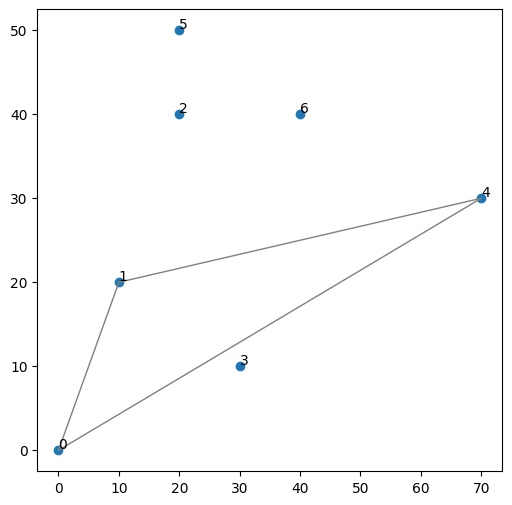

FINAL 0 114.62467658662338
min_values_for_rows [ 0.          0.         12.52324961  0.18640509  0.         24.64679937
  6.85066405]
City with bigest regret 5
Rescueing edge index to modify:  1


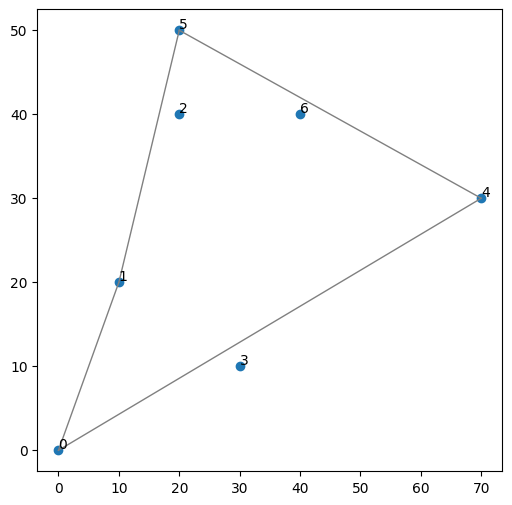

FINAL 1 139.27147595667003
min_values_for_rows [0.         0.         0.73790317 0.18640509 0.         0.
 0.13180831]
City with bigest regret 2
Rescueing edge index to modify:  2


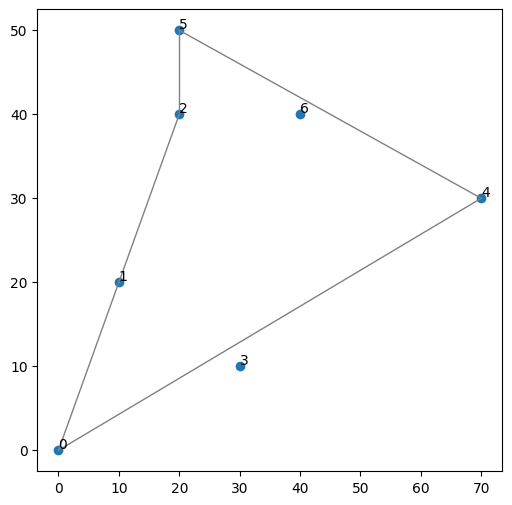

FINAL 2 140.00937912998413


In [3]:
# cur_tour = [(4,3), (3,4)]
# non_visited = [0,1,2]

cur_tour = [(0,1),(1,0)]
non_visited = list(x for x in range(NR_NODES))
non_visited.remove(cur_tour[0][0])
non_visited.remove(cur_tour[0][1])
# regret_matrix = create_regret_matrix(non_visited, cur_tour, matrix)
# print(return_biggest_regret(regret_matrix)[0:2])
total_cost = 0
# plotMap(data, edges=cur_tour, colors = False, cost = False)
for i in range(HALF_NODES):
    regret_matrix = create_regret_matrix(non_visited, cur_tour, matrix)
    rescue_node, rescueing_edge_index = return_biggest_regret(regret_matrix)
    # print("real_rescueing_edge", cur_tour[rescueing_edge_index], cur_tour)
    cur_tour, cost_diff = add_to_cycle(cur_tour[rescueing_edge_index], rescue_node, matrix, cur_tour)
    total_cost += cost_diff
    non_visited.remove(rescue_node)
    plotMap(data, edges=cur_tour, colors = False, cost=is_cost)
    print("FINAL", i, total_cost)

In [4]:
from copy import deepcopy

[2, 3, 4, 5, 6] [(0, 1), (1, 0)]
max_regrets [  0.           0.         114.62467659 114.62467659  70.26337547
 114.62467659 114.62467659]
cur_tour [(0, 1), (1, 0)]
non_visited [2, 3, 4, 5, 6]
rescue_node 2
rescuing_enge)index 0 (0, 1)
----  2 [(1, 0), [0, 2], [2, 1]] [3, 4, 5, 6]


/home/zuzabu/projects/tsp/utils.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, cmap="grey")


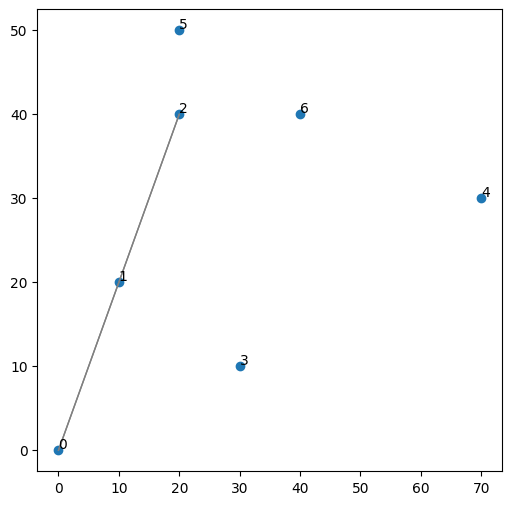

max_regrets [  0.           0.           0.         114.62467659  70.26337547
 114.62467659 114.62467659]
cur_tour [(1, 0), [0, 2], [2, 1]]
non_visited [3, 4, 5, 6]
rescue_node 3
rescuing_enge)index 1 [0, 2]
----  3 [(1, 0), [2, 1], [0, 3], [3, 2]] [4, 5, 6]


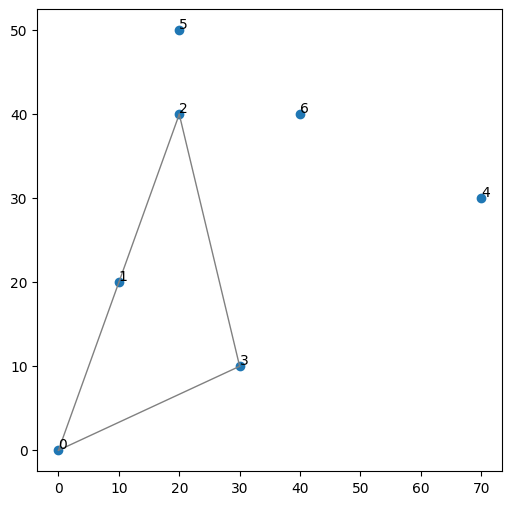

max_regrets [  0.           0.           0.           0.          70.26337547
 114.62467659 114.62467659]
cur_tour [(1, 0), [2, 1], [0, 3], [3, 2]]
non_visited [4, 5, 6]
rescue_node 5
rescuing_enge)index 1 [2, 1]
----  5 [(1, 0), [0, 3], [3, 2], [2, 5], [5, 1]] [4, 6]


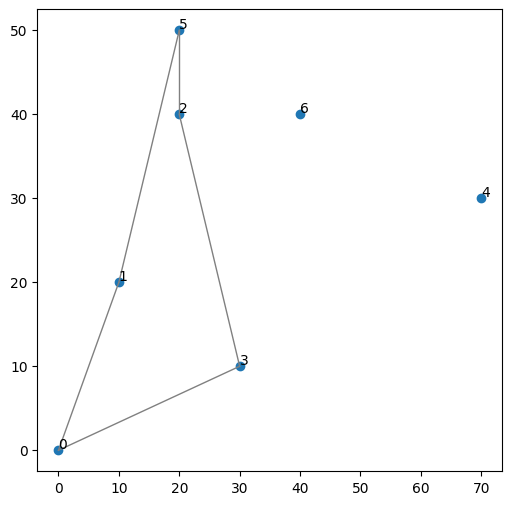

max_regrets [  0.           0.           0.           0.          70.26337547
   0.         114.62467659]
cur_tour [(1, 0), [0, 3], [3, 2], [2, 5], [5, 1]]
non_visited [4, 6]
rescue_node 6
rescuing_enge)index 2 [3, 2]
----  6 [(1, 0), [0, 3], [2, 5], [5, 1], [3, 6], [6, 2]] [4]


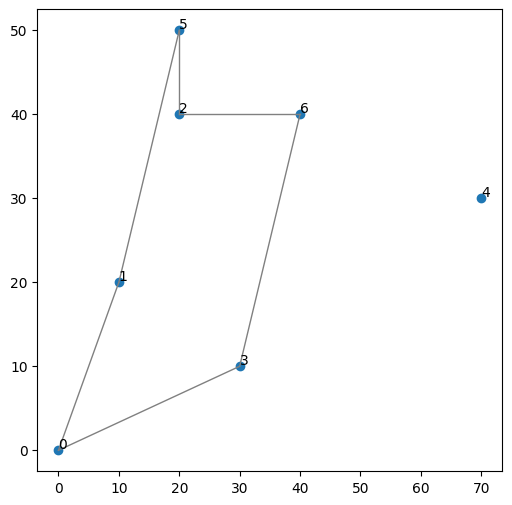

In [7]:
cur_tour = [(0,1),(1,0)]
non_visited = list(x for x in range(NR_NODES))
non_visited.remove(cur_tour[0][0])
non_visited.remove(cur_tour[0][1])
print(non_visited, cur_tour)
total_cost = 0
# plotMap(data, edges=cur_tour, colors = False, cost = False)
for i in range(4):
    start_regret_matrix = create_regret_matrix(non_visited, cur_tour, matrix)
    max_regret = np.max(start_regret_matrix)
    max_regrets = np.zeros((1,NR_NODES))[0]
    for new_node in non_visited:
        for edge in cur_tour:
            sim_non_visited = deepcopy(non_visited)
            sim_cur_tour = deepcopy(cur_tour)
            sim_cur_tour, _ = add_to_cycle(edge, new_node, matrix, sim_cur_tour)
            sim_non_visited.remove(new_node)
            sim_regret_matrix = create_regret_matrix(sim_non_visited, sim_cur_tour, matrix)
            max_regrets[new_node] = max(np.max(sim_regret_matrix), max_regrets[new_node])
            
    print("max_regrets",max_regrets)
    print("cur_tour",cur_tour)
    print("non_visited", non_visited)

    rescued_node = np.argmax(max_regrets)
    print("rescue_node",rescued_node)
    rescueing_edge_index = np.argmin(start_regret_matrix[rescued_node])
    print("rescuing_enge)index",np.argmin(start_regret_matrix[rescued_node]),cur_tour[rescueing_edge_index])

    non_visited.remove(rescued_node)
        # cur_tour, cost_diff = add_to_cycle(cur_tour[rescueing_edge_index], rescue_node, matrix, cur_tour)
    cur_tour.append([cur_tour[rescueing_edge_index][0], rescued_node])
    cur_tour.append([rescued_node, cur_tour[rescueing_edge_index][1]])
    cur_tour.remove(cur_tour[rescueing_edge_index])

    print("---- ",rescued_node, cur_tour, non_visited)
    plotMap(data, edges=cur_tour, colors = False, cost=is_cost)
        # print("FINAL", i, total_cost)